In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import os
from PIL import Image
import random
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import csv
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models

In [4]:
#EDA

#load the spectograms dataset
#path1 = '../Data/images_original/' for vscode enviroment
path1 = '/content/drive/MyDrive/GTZAN/Data/images_original'
subfolders = os.listdir(path1)
print(subfolders)
subfolders.remove('.DS_Store')
data = []

music_genre = {
    'pop' : 1,
    'metal' : 2,
    'disco' : 3,
    'blues' : 4,
    'reggae' : 5,
    'classical' : 6,
    'rock' : 7,
    'hiphop' : 8,
    'country' : 9,
    'jazz' : 10
}

#obtain the genre value from the folder name
def get_genre(folder_name):
    return music_genre[folder_name]

def get_genre_from_value(genre_value):
    for genre, value in music_genre.items():
        if value == genre_value:
            return genre
    return None  # Return None if the value is not found

for folder in subfolders:
    path2 = os.path.join(path1,folder)
    print(path2)
    files = os.listdir(path2)
    #print(files)
    for file in files:
        img_path = os.path.join(path2,file)
        #print(img_path)
        #print('Image path: ',img_path)
        #Open the image file
        img = Image.open(img_path)
        # Convert the image to RGB if it has an alpha channel (transparency)
        if img.mode == 'RGBA':
            img = img.convert('RGB')
        #display(img)
        #print(img)
        #converting an image to an ndarray
        img = np.array(img)
        genre = get_genre(folder)
        data.append({'image':img,'genre':genre})

    # print(subpath)
    # img = cv2.imread(subpath)
    # cv2.imshow('image',img)
    # cv2.waitkey(0)
    # cv2.destroyAllWindows()



['.DS_Store', 'classical', 'hiphop', 'reggae', 'country', 'jazz', 'rock', 'disco', 'blues', 'metal', 'pop']
/content/drive/MyDrive/GTZAN/Data/images_original/classical
/content/drive/MyDrive/GTZAN/Data/images_original/hiphop
/content/drive/MyDrive/GTZAN/Data/images_original/reggae
/content/drive/MyDrive/GTZAN/Data/images_original/country
/content/drive/MyDrive/GTZAN/Data/images_original/jazz
/content/drive/MyDrive/GTZAN/Data/images_original/rock
/content/drive/MyDrive/GTZAN/Data/images_original/disco
/content/drive/MyDrive/GTZAN/Data/images_original/blues
/content/drive/MyDrive/GTZAN/Data/images_original/metal
/content/drive/MyDrive/GTZAN/Data/images_original/pop


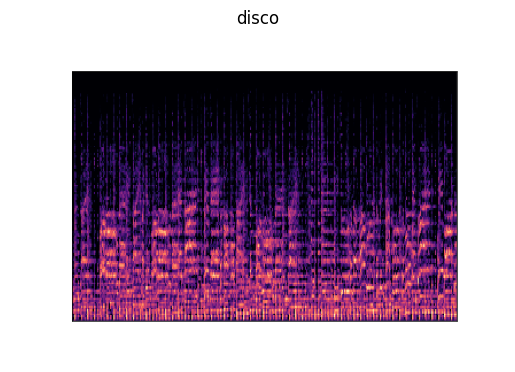

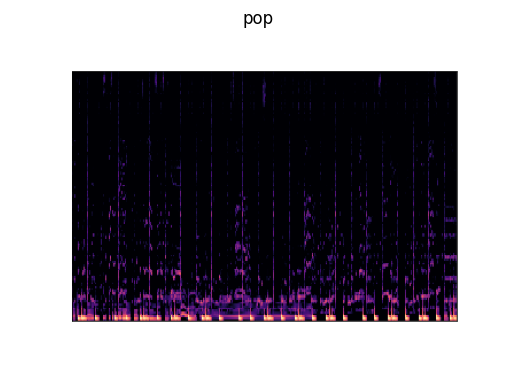

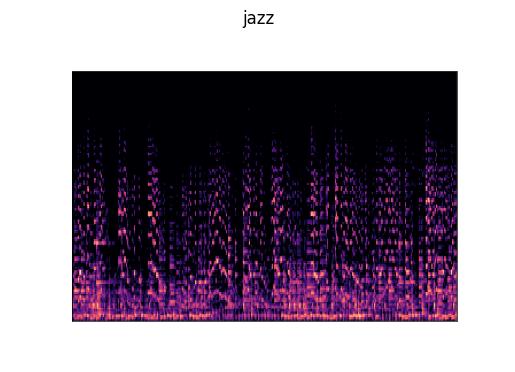

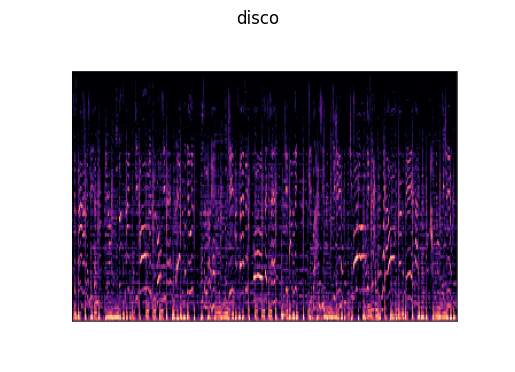

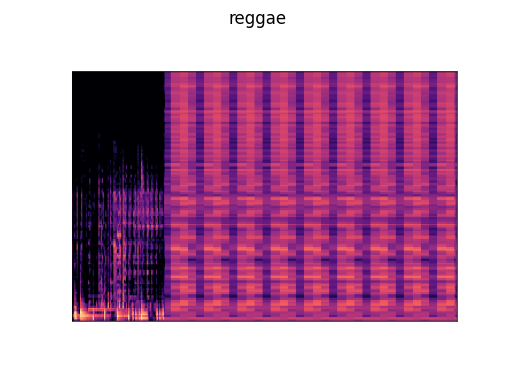

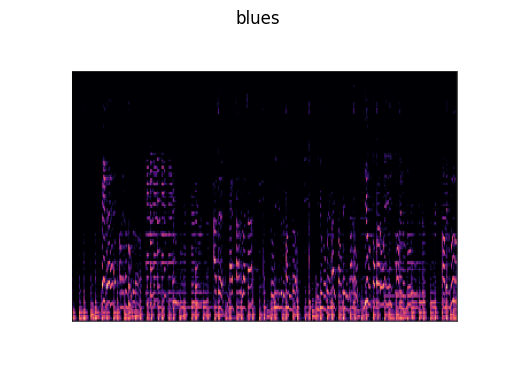

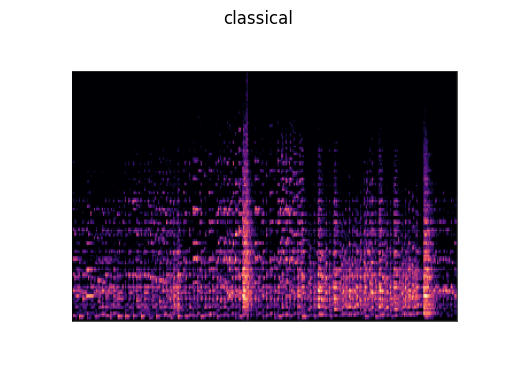

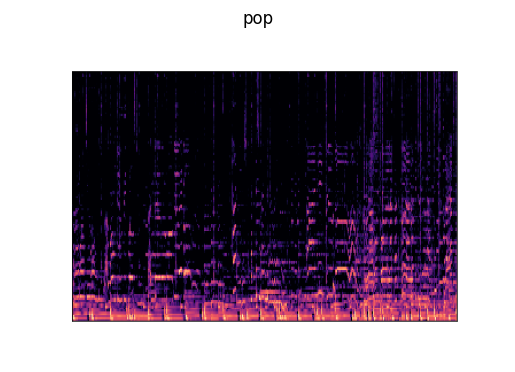

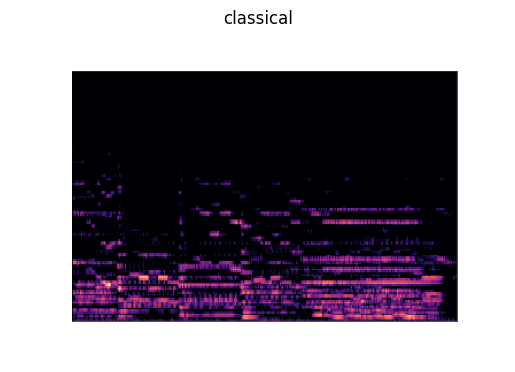

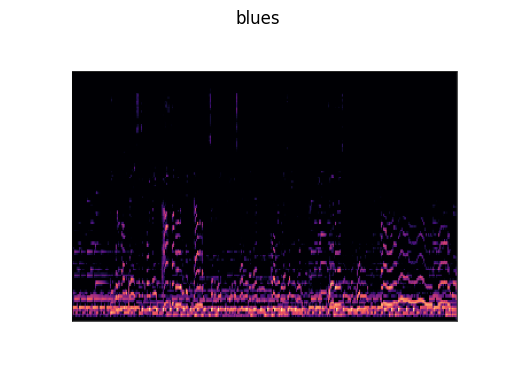

In [4]:
# dataset has been loaded and now i want to display random images from it
# We have performed EDA
for i in range(len(music_genre)):
    index = random.randint(0, len(data))
    img = data[index]['image']
    genre_value = data[index]['genre']
    genre_key = get_genre_from_value(genre_value)
    #print("Music Genre: ",genre_key)
    plt.imshow(img)
    plt.axis('off')
    plt.title(genre_key)
    plt.show()
    #display(img)
    #print("Music Genre: ",data[0]['genre'])



In [5]:
print(type(data[0]['genre']))

<class 'int'>


In [ ]:
# # Specify the file name for the CSV
# file_name = 'data.csv'
# headers = ['image', 'genre']

# # Write data to the CSV file
# with open(file_name, 'w', newline='') as csvfile:
#     writer = csv.DictWriter(csvfile, fieldnames=headers)
#     writer.writeheader()  # Write header row with column names
#     for item in data:
#         writer.writerow(item)

# print(f"Data has been saved to '{file_name}'")

Data has been saved to 'data.csv'


In [5]:
X = np.array([item['image'] for item in data])#images in numpy.ndarray form
y = np.array([item['genre'] for item in data])#labels in int form

# Print shapes to verify
print("X shape:", X.shape)# (999, 288, 432, 3)
print("y shape:", y.shape)# (999,)


X shape: (999, 288, 432, 3)
y shape: (999,)


In [6]:
from sklearn.model_selection import train_test_split

# Assuming you have X (images) and y (genres) arrays

# Splitting the data into a temporary train and test set (85% - 15%)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Calculating the validation set size based on the total number of samples
validation_ratio = 0.10
validation_size = int((len(X_temp) * validation_ratio) / (1 - 0.15))  # Adjusted based on the remaining 85%

# Further splitting the temporary train set into train and validation sets (75% - 10%)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=validation_size, random_state=42)

# Printing the shapes to verify
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)


X_train shape: (750, 288, 432, 3)
X_val shape: (99, 288, 432, 3)
X_test shape: (150, 288, 432, 3)


In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Assuming you have X_train, y_train, X_val, y_val, X_test, y_test containing your data

# Normalize pixel values to be between 0 and 1
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

image_height = 288
image_width = 432
num_channels = 3

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, num_channels)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dense(11, activation='softmax')  # Output layer with 11 classes (genres)
])



# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=42, validation_data=(X_val, y_val))

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')


Epoch 1/20
18/18 [==============================] - 23s 405ms/step - loss: 2.5066 - accuracy: 0.0947 - val_loss: 2.3480 - val_accuracy: 0.0808
Epoch 2/20
18/18 [==============================] - 4s 201ms/step - loss: 2.3564 - accuracy: 0.1027 - val_loss: 2.3340 - val_accuracy: 0.2222
Epoch 3/20
18/18 [==============================] - 3s 183ms/step - loss: 2.3304 - accuracy: 0.1067 - val_loss: 2.3024 - val_accuracy: 0.1616
Epoch 4/20
18/18 [==============================] - 3s 178ms/step - loss: 2.2859 - accuracy: 0.1333 - val_loss: 2.2221 - val_accuracy: 0.2121
Epoch 5/20
18/18 [==============================] - 3s 179ms/step - loss: 2.2243 - accuracy: 0.1720 - val_loss: 2.0438 - val_accuracy: 0.2020
Epoch 6/20
18/18 [==============================] - 3s 191ms/step - loss: 2.2065 - accuracy: 0.1680 - val_loss: 1.9863 - val_accuracy: 0.2525
Epoch 7/20
18/18 [==============================] - 4s 200ms/step - loss: 2.0666 - accuracy: 0.2507 - val_loss: 1.9024 - val_accuracy: 0.2727
Epoch

In [8]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

5/5 [==============================] - 0s 52ms/step - loss: 1.3170 - accuracy: 0.5667
Test accuracy: 0.5666666626930237


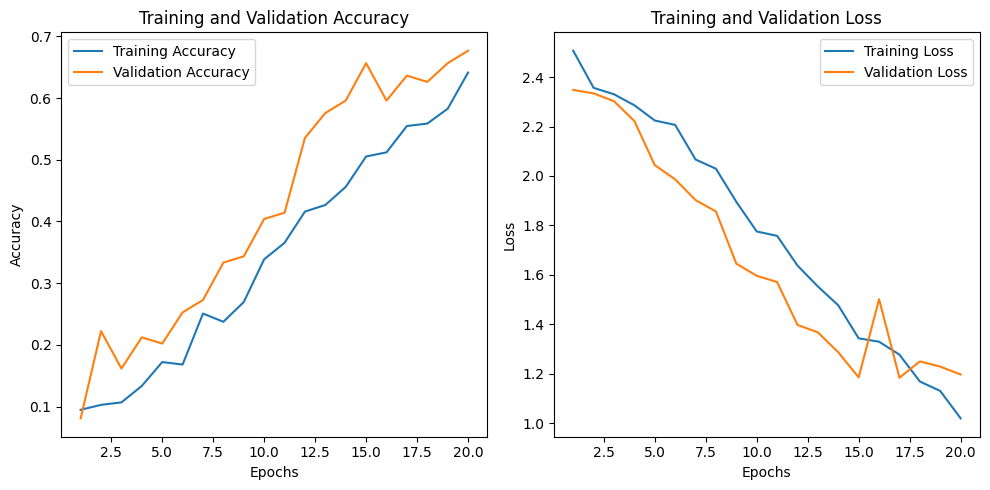

In [9]:
# Extract training and validation accuracy and loss from the 'history' object
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plotting training and validation accuracy over epochs
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Training Accuracy')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting training and validation loss over epochs
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
#testing model


In [10]:
#saving model
model.save('cnn_model1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [12]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('/content/cnn_model1.h5')  # Load the model saved as 'my_model.h5'

In [ ]:
# Define hyperparameters to search through
optimizers = ['adam', 'sgd']
units_options = [64, 128, 256]
dropout_rates = [0.2, 0.3, 0.4]
best_accuracy = 0.0
best_hyperparameters = {}

# Iterate through different hyperparameter combinations
for optimizer in optimizers:
    for units in units_options:
        for dropout_rate in dropout_rates:
            # Define and compile the model with the current hyperparameters
            # model = models.Sequential([
            #     layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, num_channels)),
            #     # ... (add other layers based on your original model architecture)
            #     layers.Dense(units, activation='relu'),
            #     layers.Dropout(dropout_rate),
            #     layers.Dense(11, activation='softmax')
            # ])

            model.compile(optimizer=optimizer,
                          loss='sparse_categorical_crossentropy',
                          metrics=['accuracy'])

            # Train the model using X_train, y_train and validate on X_val, y_val
            history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), verbose=0)

            # Evaluate model on validation data
            _, accuracy = model.evaluate(X_val, y_val)

            # Check if current hyperparameters achieve better accuracy
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_hyperparameters = {'optimizer': optimizer, 'units': units, 'dropout_rate': dropout_rate}

print(f"Best hyperparameters: {best_hyperparameters}")


4/4 [==============================] - 7s 2s/step - loss: 5.6806 - accuracy: 0.5758
